# Programming Assignment - Jupyter Notebook

*You are expected to use this notebook to answer the questions in the Programming Assignment Quiz.*

*Cells that correspond to the different quiz questions are clearly marked. You can write your code there and run it, keeping a note of the output.*

*Make sure that you run any code already provided in this notebook - this is, in many cases, required for answering the Programming Assignment quiz questions.*

Good luck!

In [1]:
import pandas as pd
import sklearn
import numpy as np

## Part 1: Programming in Python

### 1.1 Lists

The code in the following cell specifies a list of proteins.

In [2]:
proteins = ['selectin', 'collagen', 'elastin', 'insulin', 'coronin', 'myosin']

### <font color='mediumblue'>Quiz Question 1</font>

Write your code in the next cell to remove the 'coronin' element.

In [3]:
proteins.remove('coronin')

### 1.2 DataFrames

Run the code in the next cell to read a (fictitious) dataset about doctors working in a particular hospital.

In [4]:
doctors = pd.read_csv('./readonly/doctors.csv')

In [5]:
doctors.head()

,doctorID,name,age,experience,specialty,rating
0,d549383,John,60,30,Anaesthetics,8.8
1,d962474,Rhona,30,3,Neurology,8.9
2,d762309,Clara,36,10,Neurology,7.3
3,d224174,Hugh,33,9,Neurology,9.3
4,d987345,Elaine,48,13,Rheumatology,6.9


### <font color='mediumblue'>Quiz Question 2</font>

Write your code in the next cell to get the names of the columns in this dataset.

In [6]:
doctors.columns

Index(['doctorID', 'name', 'age', 'experience', 'specialty', 'rating'], dtype='object')

*Optional*: If you are interested in exploring the doctors dataset further (e.g. view its first few rows), then you can use the following cell. Remember that you can add more cells if you wish to.

### <font color='mediumblue'>Quiz Question 3</font>

Write your code in the next cell to get all records of doctors that have 15 or more years of experience.

In [7]:
experienced_doctors = doctors[doctors['experience'] >= 15]

In [8]:
experienced_doctors

,doctorID,name,age,experience,specialty,rating
0,d549383,John,60,30,Anaesthetics,8.8
5,d947509,Christine,52,26,Anaesthetics,8.9
6,d798745,Stephen,62,27,Neurology,5.3
7,d365567,Alison,61,24,Orthodontics,6.7
8,d098435,James,53,19,Urology,6.8
11,d987235,Dave,52,18,Rheumatology,9.4
12,D653390,George,59,15,Anaesthetics,9.5
13,d993624,Lucy,64,32,Urology,8.1
17,d987435,Harry,52,19,Anaesthetics,7.2
19,d994375,Isla,53,23,Urology,7.1


### <font color='mediumblue'>Quiz Question 4</font>

Write your code in the next cell to get the maximum rating for all doctors in the dataset.

In [9]:
max_rating = doctors['rating'].max()
max_rating

9.5

### <font color='mediumblue'>Quiz Question 5</font>

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

Write your code in the next cell to get a boxplot for ratings of all doctors that have 15 or more years of experience.

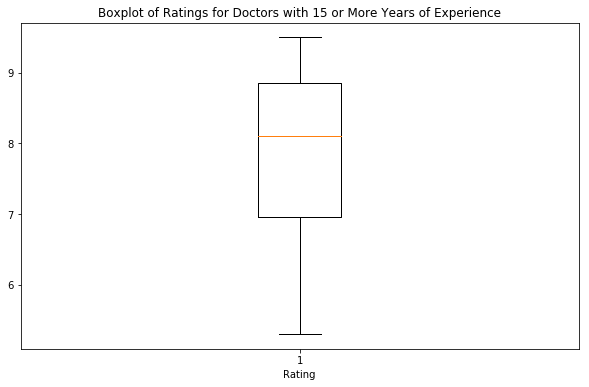

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(experienced_doctors['rating'], vert=True)
plt.title('Boxplot of Ratings for Doctors with 15 or More Years of Experience')
plt.xlabel('Rating')
plt.show()

## Part 2: Machine Learning

### 2.1 Familiarising ourselves with the data

In this programming task, we are going to be using the **Breast Cancer Wisconsin Dataset**. This includes data about different patients and the corresponding diagnosis. In particular, features are computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The diagnosis involves characterising the tumour as 'malignant' or 'benign' (labelled 0 and 1, respectively). 

This dataset is built in scikit-learn, just like the iris dataset that we saw in this weeks' programming task.

We'll load the dataset and call it *cancer_dataset*.

In [12]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

Note that, similarly to the iris_dataset object that we saw in this week's programming task, the *cancer_dataset* object that is returned by *load_breast_cancer* is a *Bunch* object. By running the next cell, you will see that its structure is very similar to that of the iris_dataset object.

In [13]:
print("Keys of cancer_dataset: ", cancer_dataset.keys())

Keys of cancer_dataset:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


*Optional*: If you are interested in exploring the cancer_dataset object (e.g. its feature names, target names, etc.), then write your code in the following cell and run it. Remember that you can add more cells if you wish to.

### <font color='mediumblue'>Quiz Question 6</font>

Write your code in the next cell to get the shape of the *data* part of the cancer_dataset.

In [14]:
cancer_dataset.data.shape

(569, 30)

### 2.2 Splitting our dataset into training data and test data

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_dataset['data'], cancer_dataset['target'], random_state=0)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 2.3 K Nearest Neighbours

We will now learn how to build a classification model for the breast cancer dataset with the use of the k nearest neighbours algorithm.

#### Building and evaluating the model for 1 nearest neighbour

Run the code below to create a *KNeighborsClassifier* model called *knn_model*. Note that *n_neighbors=1* is setting the number of nearest neighbours to 1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
print("Test set score: {:.3f}".format(knn_model.score(X_test, y_test)))

Test set score: 0.916


### <font color='mediumblue'>Quiz Question 7</font>

Write your code in the next cell(s) to build and evaluate a K Nearest Neighbours model for 5 neighbours.

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
y_pred = knn_model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.93706293706293708

#### Using the model to make predictions

The following code specifies a previously unseen patient case.

In [22]:
X_new = np.array([[
  1.239e+01, 1.538e+01, 1.328e+02, 1.382e+03, 1.007e-01, 2.661e-01, 3.791e-01,
  1.001e-01, 2.009e-01, 6.371e-02, 6.895e-01, 8.943e-01, 4.259e+00, 9.594e+01,
  5.789e-03, 3.864e-02, 3.233e-02, 1.187e-02, 3.003e-02, 5.923e-03, 2.242e+01,
  1.689e+01, 1.926e+02, 2.721e+03, 1.782e-01, 5.461e-01, 6.579e-01, 1.958e-01,
  4.811e-01, 1.008e-01]])

### <font color='mediumblue'>Quiz Question 8</font>

Write your code in the next cell to use your K Nearest Neighbours model for 5 neighbours to make a prediction for this new patient case.

In [23]:
y_pred_new = knn_model.predict(X_new)

In [24]:
y_pred_new

array([0])

### 2.4 Decision Tree

Use the training and test data specified in Section 2.2 to create a Decision Tree with maximal depth 5.

*Important note*: You should set the *random_state* parameter of the DecisionTreeClassifier to 20.

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, random_state=20)

In [26]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

In [27]:
y_pred_dt = dt_model.predict(X_test)

### <font color='mediumblue'>Quiz Question 9</font>

Evaluate the accuracy of the decision tree that you just built.

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_dt)

0.90909090909090906

### <font color='mediumblue'>Quiz Question 10</font>

Write your code in the next cell(s) to use your decision tree model to make a prediction for the new patient case specified earlier in this notebook.

In [29]:
y_pred_new = dt_model.predict(X_new)

In [30]:
y_pred_new

array([0])